# Assignment-1 (KNN Classifier)
## Handwritten digit recognition
In this assignment, we will build a classifier that takes an image of a handwritten digit and outputs a label 0-9.

## The MNIST dataset
`MNIST` is a classic dataset in machine learning, consisting of 28x28 gray-scale images handwritten digits. The training set contains 60,000 examples and the test set contains 10,000 examples. In this assignment we will further split the training set to take out 12,000 examples as a validation step.

In [1]:
%matplotlib inline
import gzip, os
import numpy as np
import matplotlib.pyplot as plt
import time
from urllib.request import urlretrieve

In [2]:
# Function that downloads a specified MNIST data file from Yann Le Cun's website
def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
    print("Downloading %s" % filename)
    urlretrieve(source + filename, filename)

# Invokes download() if necessary, then reads in images
def load_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1,784)
    return data

def load_mnist_labels(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

In [3]:
## Load the training set
train_data = load_mnist_images('train-images-idx3-ubyte.gz')
train_labels = load_mnist_labels('train-labels-idx1-ubyte.gz')

## Load the testing set
test_data = load_mnist_images('t10k-images-idx3-ubyte.gz')
test_labels = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import time

## Load the training set
train_data = np.load('MNIST/train_data.npy')
train_labels = np.load('MNIST/train_labels.npy')

## Load the testing set
test_data = np.load('MNIST/test_data.npy')
test_labels = np.load('MNIST/test_labels.npy')

In [4]:
## Print out their dimensions
print("Training dataset dimensions: ", np.shape(train_data))
print("Number of training labels: ", len(train_labels))
print("Testing dataset dimensions: ", np.shape(test_data))
print("Number of testing labels: ", len(test_labels))

Training dataset dimensions:  (60000, 784)
Number of training labels:  60000
Testing dataset dimensions:  (10000, 784)
Number of testing labels:  10000


In [5]:
## Compute the number of examples of each digit
train_digits, train_counts = np.unique(train_labels, return_counts=True)
print("Training set distribution:")
print(dict(zip(train_digits, train_counts)))

test_digits, test_counts = np.unique(test_labels, return_counts=True)
print("Test set distribution:")
print(dict(zip(test_digits, test_counts)))

Training set distribution:
{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test set distribution:
{0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


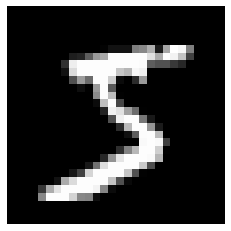

Label 5


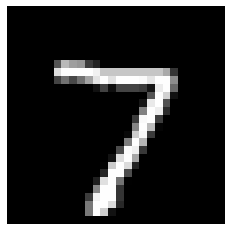

Label 7


In [6]:
## Define a function that displays a digit given its vector representation
def show_digit(x):
    plt.axis('off')
    plt.imshow(x.reshape((28,28)), cmap=plt.cm.gray)
    plt.show()
    return

## Define a function that takes an index into a particular data set ("train" or "test") and displays that image.
def vis_image(index, dataset="train"):
    if(dataset=="train"): 
        show_digit(train_data[index,])
        label = train_labels[index]
    else:
        show_digit(test_data[index,])
        label = test_labels[index]
    print("Label " + str(label))
    return

## View the first data point in the training set
vis_image(0, "train")

## Now view the first data point in the test set
vis_image(0, "test")

## Splitting the Train data to Train and Validate Sets

In [7]:
from sklearn.model_selection import train_test_split
trainx, valx, trainy, valy = train_test_split(train_data, train_labels, test_size=0.20, random_state=42)

## Nearest neighbor classification with L2 distance

To compute nearest neighbors in our data set, we need to first be able to compute distances between data points. A natural distance function is _Euclidean distance_: for two vectors $x, y \in \mathbb{R}^d$, their Euclidean distance is defined as 
$$\|x - y\| = \sqrt{\sum_{i=1}^d (x_i - y_i)^2}.$$
Often we omit the square root, and simply compute _squared Euclidean distance_:
$$\|x - y\|^2 = \sum_{i=1}^d (x_i - y_i)^2.$$
For the purposes of nearest neighbor computations, the two are equivalent: for three vectors $x, y, z \in \mathbb{R}^d$, we have $\|x - y\| \leq \|x - z\|$ if and only if $\|x - y\|^2 \leq \|x - z\|^2$.

## 1. Nearest neighbor classification with L2 distance

Write a function, **NN_L2**, which takes as input the training data (`trainx` and `trainy`) and the test points (`evalx`) and predicts labels for these test points using 1-NN classification. These labels should be returned in a `numpy` array with one entry per test point. For **NN_L2**, the L2 norm should be used as the distance metric.

In [ ]:
def NN_L2(trainx, trainy, evalx):
    # inputs: trainx, trainy, testx <-- as defined above
    # output: an np.array of the predicted values for testy 
    
    ### START CODE HERE ###
    return None
    ### END CODE HERE ###

## 2. K-Nearest neighbor classification with L2 distance

Write a function, **KNN_L2**, which takes as input the training data (`trainx` and `trainy`), the test points (`evalx`), and the value of **K** (integer) and predicts labels for these test points using K-NN classification. These labels should be returned in a `numpy` array with one entry per test point.

In [ ]:
def KNN_L2(trainx, trainy, evalx, K):
    # output: an np.array of the predicted values for testy 
    
    ### START CODE HERE ###
    return None
    ### END CODE HERE ###

## 3. Nearest neighbor classification with L1 distance

We now compute nearest neighbors using the L1 distance (sometimes called *Manhattan Distance*).

Write a function, **NN_L1**, which again takes as input the arrays `trainx`, `trainy`, and `evalx`, and predicts labels for the test points using 1-nearest neighbor classification. For **NN_L1**, the L1 distance metric should be used. As before, the predicted labels should be returned in a `numpy` array with one entry per test point.

Notice that **NN_L1** and **NN_L2** may well produce different predictions on the test set.

In [ ]:
def NN_L1(trainx, trainy, evalx):
    # inputs: trainx, trainy, testx <-- as defined above
    # output: an np.array of the predicted values for testy 
    
    ### START CODE HERE ###
    return None
    ### END CODE HERE ###

## 4. K-Nearest neighbor classification with L1 distance

Write a function, **KNN_L1**, which takes as input the training data (`trainx` and `trainy`), the test points (`evalx`), and the value of **K** (integer) and predicts labels for these test points using K-NN classification and L1 distance metric. These labels should be returned in a `numpy` array with one entry per test point.

In [ ]:
def KNN_L1(trainx, trainy, evalx, K):
    # output: an np.array of the predicted values for testy 
    
    ### START CODE HERE ###
    return None
    ### END CODE HERE ###

## 5. K-Nearest neighbor classifier

Write a function, **KNN**, which takes as input the training data (`trainx` and `trainy`), the test points (`evalx`), the value of **K** (integer), and a parameter for deciding the distance metric to be used (fr example 1 for L1 and 2 for L2) and predicts labels for these test points using KNN classification. These labels should be returned in a `numpy` array with one entry per test point.

In [ ]:
def KNN(trainx, trainy, evalx, K, dist_metric=2):
    # output: an np.array of the predicted values for testy 
    
    ### START CODE HERE ###
    return None
    ### END CODE HERE ###

## 6. Putting it all together

Write code that allows you to select the hyper-parameters (distance measure and the value of K) by calling the KNN classifier with different values of K and either L1 or L2 distance measure. Make sure that you set the hyper-parameters using the development set and not the test set. You need to systemtically try different values for K in conjunction with a distance measure and tabulate the results (in the assignment report) and not down the best hyper-parameter settings.

In [ ]:
### START CODE HERE ###

### END CODE HERE ###

# 7. Test errors and the confusion matrix

Once the hyper-parameters have been selected, we now would like to perform a final evaluation on the test set and record the error rates. Also, Write a function, **confusion**, which takes as input the true labels for the test set (that is, `testy`) as well as the predicted labels and returns the confusion matrix. The confusion matrix should be a `np.array` of shape `(10,10)`. Also, record the confusion matrix in your assignment report.

**Note:** Record the cpu time it takes to perform the evaluation on the test set using functions like **time.time()**.

In [ ]:
def confusion(testy, testy_fit):
    # inputs: the correct labels, the fitted KNN labels 
    # output: a 10x10 np.array representing the confusion matrix as above
    
    ### START CODE HERE ###
    return None
    ### END CODE HERE ###

In [ ]:
# Code for performing the final evaluation on the test set and generating the confuson matrix.
### START CODE HERE ###

### END CODE HERE ###

## 8. Faster nearest neighbor methods

Performing nearest neighbor classification in the way we have presented requires a full pass through the training set in order to classify a single point. If there are $N$ training points in $\mathbb{R}^d$, this takes $O(N d)$ time.

Fortunately, there are faster methods to perform nearest neighbor look up if we are willing to spend some time preprocessing the training set. `scikit-learn` has fast implementations of two useful nearest neighbor data structures: the _ball tree_ and the _k-d tree_. Study the KDTree and use it to make KNN predictions. Record the error rates on the test set and the cpu time taken for evaluation.

**Note:** Here you don't have to implement teh KDTree but just you need to use it from ``sklearn`` library.

In [ ]:
from sklearn.neighbors import KDTree
### START CODE HERE ###

### END CODE HERE ###

## 9. Preparing the assignment report

You need to prepare the assignment report and submit your code and report to the Blackboard assignment. You need to record your answers for the following questions in the report:
1. What is the error rate on the validation set for NN_L2?
2. What is the best error rate on the validation set for KNN_L2?
3. What is the error rate on the validation set for NN_L1?
4. What is the best error rate on the validation set for KNN_L1?
5. What is the error rate on the test set?
6. Which digit class has the most errorrs? And, with which class does it get the most confused? Do you have ideas to fix this problem?


## 10. Extra Stuff

You are invited to try some more ideas as extra work like:
1. Implementing weighted KNN where the vote of a neighbour is scaled down based on its distance from the test point.
3. Implement L_infinity distance measure and use it for classification.
2. Instead of using the pixels as features, implement your own features (example: what were presented in the slides) and use them for KNN. You need to keep in mind that if you compute features which have different scales then it is important to scale/normalize the features (discussed in the slides).